# Análise Descritiva - Terceiro Estágio
### Descrição:
- Obtenha os dados dos horários presentes [aqui](https://github.com/zegildo/francisdrake);
- Crie 10 perguntas em seu documento databricks ou jupyter;
- Resposta as perguntas tendo como base gráficos construído;
- Apresente suas conclusões e novas hipóteses encontradas;

#### Perguntas : 

1. Quais as disciplinas que mais foram ofertadas na graduação ?
2. Quais as Matatérias que apresentam dados inconsistentes?
3. Há dados nulos? vazios? 
4. Quais as maiores cargas horários já ofertadas?
5. Nos dados, há algum departamento extinto?
6. Como foi a distribuição de disciplinas por período?
7. Quais as disciplinas ofertadas em 2019.1?
8. Quais são as disciplinas com carga horária em 90h?
9. Quantas turmas de *pos - graduação* e de *graduação* estão disponíveis?
10. Com base na pergunta anterior, quais são de 2009?

In [208]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [281]:
horarios_ufersa = pd.DataFrame(pd.read_csv("input/horarios_ufersa.csv", delimiter=","))
colunas_horarios_ufersa = ['siape','tipo', 'periodo','cod_dis','disciplina','carg_h','horario']
horarios_ufersa.columns = colunas_horarios_ufersa
horarios_ufersa.carg_h = horarios_ufersa.carg_h.str.replace('h', '').astype('int64')
horasas = horarios_ufersa.carg_h
horarios_ufersa.tipo = horarios_ufersa['tipo'].astype(str)
professors_information = pd.DataFrame(pd.read_csv("input/professors_information.csv", delimiter=","))
colunas_professors_information = ['siape','nome', 'departamento', 'url_foto','Portal_Siape']
professors_information.columns = colunas_professors_information
departamento = professors_information['departamento']
professors_information.head(6)

,siape,nome,departamento,url_foto,Portal_Siape
0,1649777,ANA TEREZA DE ABREU LIMA,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...
1,3738738,ANDRÉ MOREIRA DE OLIVEIRA,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...
2,2647223,ANTONIO VITOR MACHADO,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...
3,1872410,DANIELY FORMIGA BRAGA,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...
4,2355526,DAVI DA COSTA ALMEIDA,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...
5,1801817,EDNA LUCIA DA ROCHA LINHARES,DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS,https://sigaa.ufersa.edu.br/sigaa/verFoto?idFo...,https://sigaa.ufersa.edu.br/sigaa/public/docen...


In [280]:
horarios_ufersa.head(6)

,siape,tipo,periodo,cod_dis,disciplina,carg_h,horario
0,1975594,turmas-graduacao,2018.2,AAS0700,LIBRAS (1200585),60,2N12 4N34
1,1975594,turmas-graduacao,2018.2,CMA1458,LÍNGUA BRASILEIRA DE SINAIS - LIBRAS,60,2N12 4N34
2,1975594,turmas-graduacao,2018.2,CMA1463,PRÁTICAS PEDAGÓGICAS INTEGRATIVAS III,60,35N12
3,1975594,turmas-graduacao,2018.1,AAS0452,EDUCACAO ESPECIAL E INCLUSAO (1206025),60,2N34 4N12
4,1975594,turmas-graduacao,2018.1,CMA1456,EDUCAÇÃO ESPECIAL E INCLUSIVA,60,2N34 4N12
5,1975594,turmas-graduacao,2018.1,AAS0700,LIBRAS (1200585),60,2N12 4N34


In [183]:
horarios_ufersa_horario = pd.DataFrame(horarios_ufersa['horario'])
horarios_ufersa_disciplinas = pd.DataFrame(horarios_ufersa['disciplina']).drop_duplicates()

In [43]:
#Quais professores tem maiores cargas Horarioas ?
siape_disciplina = pd.DataFrame(columns=['siape','disciplina'])
siape_disciplina.siape= horarios_ufersa.siape.astype('int64')
siape_disciplina.disciplina = horarios_ufersa.disciplina

siape_professor = pd.DataFrame(columns = ['siape', 'professor'])
siape_professor.professor = professors_information.nome
siape_professor.siape = professors_information.siape.astype('int64')

### Índice de Tendência central da carga horário dos professores 

In [139]:
pd.DataFrame(horarios_ufersa['carg_h'].describe())

,carg_h
count,25672.000000
mean,59.543510
std,28.130433
min,0.000000
25%,60.000000
50%,60.000000
75%,60.000000
max,720.000000


######  1. Quais as disciplinas que mais foram ofertadas na graduação ?
Foi possível perceber que as disciplinas mais ofertadas são as disciplinas do departamento de exatas, que  poder ser a causa as disciplinas nas quais mais se reprovam.

Text(0.5, 0, 'Quantidade de vezes que foi ofertada')

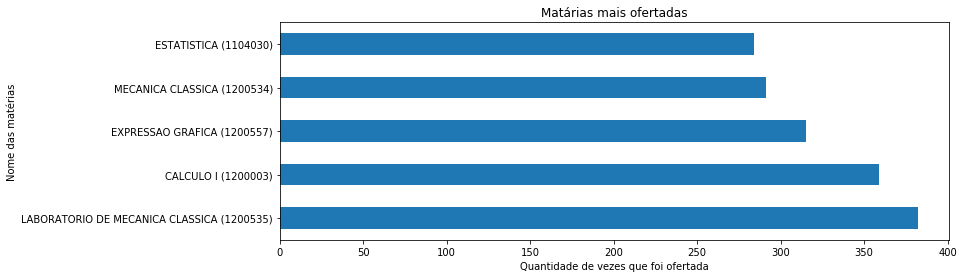

In [44]:
fig_oferta = plt.figure(figsize = (12,4))
fig_oferta = pd.value_counts(horarios_ufersa['disciplina']).head(5).plot.barh()
fig_oferta.set_title('Matárias mais ofertadas')
fig_oferta.set_ylabel('Nome das matérias')
fig_oferta.set_xlabel('Quantidade de vezes que foi ofertada')

#### 2. Quais as matérias que apresentam dados mais inconsistentes?

In [174]:
print (horarios_ufersa.max().disciplina, "| Carga horária : |", horarios_ufersa.max().carg_h,"h")
print (horarios_ufersa.min().disciplina, "| Carga horária : |", horasas.min(),"h")

ÓTICA E FÍSICA MODERNA | Carga horária : | 720 h
A COMÉDIA E A TRAGÉDIA NA OBRA SHAKESPEAREANA | Carga horária : | 0 h


####  3. Há dados nulos? vazios?
Como foi visto abaixo, não há inconsistência do tipo de dados nulos.

In [176]:
print('Valores vazios :',horarios_ufersa.isnull().sum().sum())

Valores vazios : 0


#### 4. Quais as maiores cargas horários já ofertadas?
É possível perceber que há muitos *outside*, algo que se tornou interessante foi o fato que há matérias de 720 horas, algo que não é cabivel em um periodo letivo normal. E também foi encontrado uma materia do período de 2007 que a carga horária total foi de 0 horas.

Text(0, 0.5, 'Carga Horário em h')

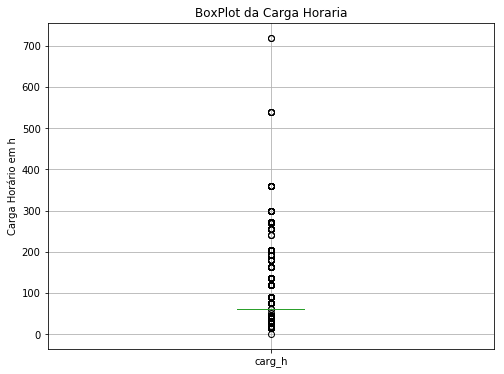

In [243]:
#Quais as maiores cargas horários já ofertadas?
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
horarios_ufersa.boxplot(column='carg_h', ax=ax)
ax.set_title('BoxPlot da Carga Horaria')
ax.set_ylabel('Carga Horário em h')

#### 5. Nos dados, há algum departamento extinto?
Não, não há departamentos extintos "ativos".

In [196]:
print( re.search('\\extinto\\b', str(departamento).lower(), re.IGNORECASE))

None


#### 6. Como foi a distribuição de disciplinas por período?
No ano de 2014 foi onde teva a maior frequências de matérias abertas 

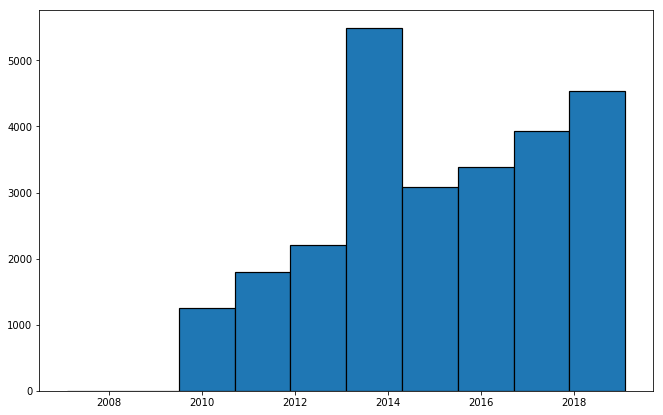

In [249]:
plt.hist(horarios_ufersa.periodo, edgecolor='black', linewidth=1.2)
plt.rcParams['figure.figsize'] = (11,7)

#### 7. Quais as disciplinas ofertadas em 2019.1?
Foi ofertadas as disciplínas *Remédios Constitucionais* e a *Jurudição constitucional e controle de constitucionalidade*, respectivamente de 15 e 30 horas

<BarContainer object of 2 artists>

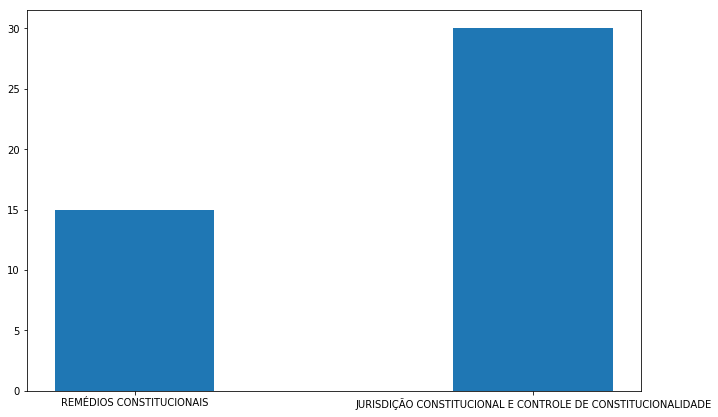

In [260]:
horarios_u = horarios_ufersa[horarios_ufersa.periodo > 2019]
plt.bar(horarios_u.disciplina, horarios_u.carg_h, width=0.4, align='center')

#### 8. Quais são as disciplinas com carga horária em 90h?

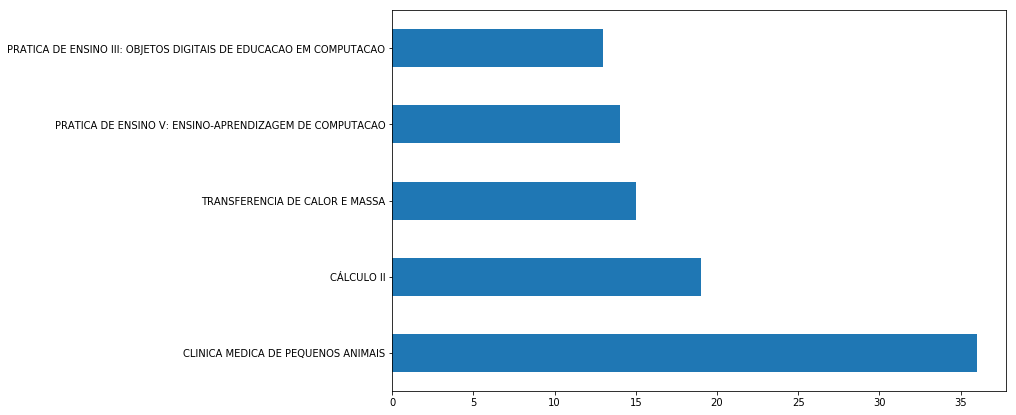

In [277]:
horas_ufersa = horarios_ufersa[horarios_ufersa.carg_h == 90]
horas_ufersa.disciplina.value_counts().head().plot.barh()

#### 9. Quantas turmas de *pos - graduação* e de *graduação* estão disponíveis?
Como mostrado, temos mais turmas de graduação, que se mostra muito bom, mas a continuidade do aluno na acadêmia na continuidade dos estudos pode se considerar baixa, a acadêmia consegue reter somente uma baixa quantidade de alunos na grade de uma *pos-graduação*.

Text(0, 0.5, 'Quantidade de matérias disponíveis')

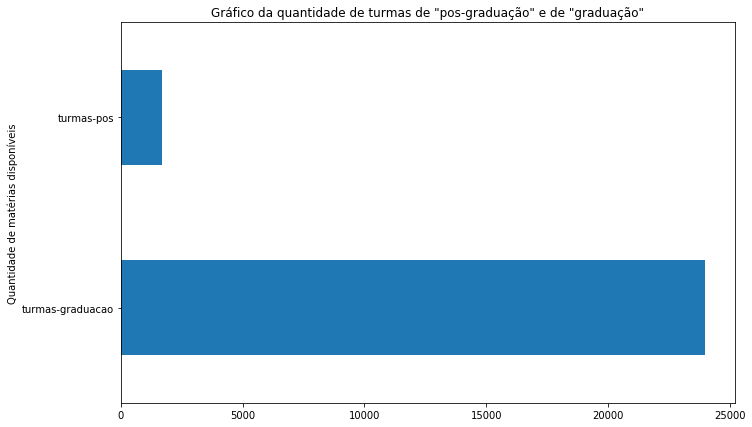

In [301]:
#9. Quantas turmas de *pos - graduação* e de *graduação* estão disponíveis?
fig_ofertaa = pd.value_counts(horarios_ufersa.tipo).plot.barh()
fig_ofertaa.set_title('Gráfico da quantidade de turmas de "pos-graduação" e de "graduação"')
fig_ofertaa.set_ylabel('Quantidade de matérias disponíveis')

#### 10. Com base na pergunta anterior, quais são de 2009?
Vemos também que não tem tanta retenção dos alunos para a *pos-graduação*, se mantém constante como o grafico anterior

Text(0, 0.5, 'Quantidade de matérias disponíveis')

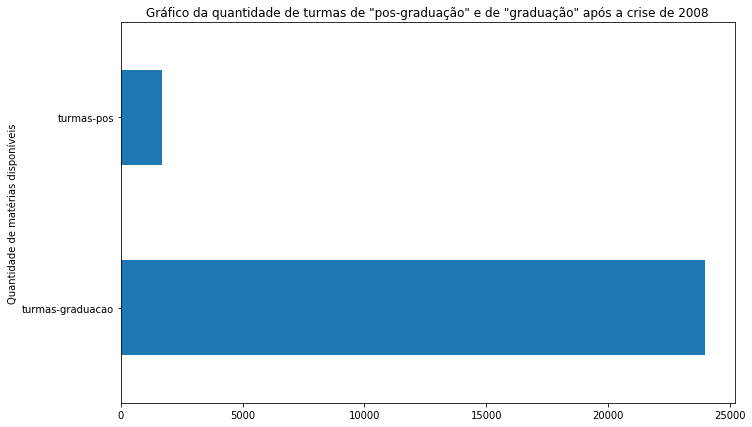

In [314]:
#Com base na pergunta anterior, quais são de 2009?
horarios_a = horarios_ufersa[horarios_ufersa.periodo > 2009]
fig_aas = pd.value_counts(horarios_a.tipo).plot.barh()
fig_aas.set_title('Gráfico da quantidade de turmas de "pos-graduação" e de "graduação" após a crise de 2008')
fig_aas.set_ylabel('Quantidade de matérias disponíveis')